In [1]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/baseline'
device = torch.device('cuda:0')

In [2]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [4]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [4]:
from torch import nn
from torch.optim import Adam

from models.Unet import Unet

net = Unet(3, 1, 64, 4).to(device)
optimizer = Adam(net.parameters(), lr=lr)
criterion = nn.BCELoss()

In [5]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, ck_dir=ck_dir)

Epoch: 0, Train Loss: 0.670096333026886, Test Loss: 0.5341919696331022
Saving model to checkpoint/baseline/check0.pt
Epoch: 1, Train Loss: 0.5109901678562165, Test Loss: 0.3971593844145537
val_loss improved from 0.5342 to 0.3972, saving model to checkpoint/baseline/check1.pt
Epoch: 2, Train Loss: 0.43640611290931697, Test Loss: 0.36305000372230994
val_loss improved from 0.3972 to 0.3631, saving model to checkpoint/baseline/check2.pt
Epoch: 3, Train Loss: 0.39072147369384763, Test Loss: 0.3358124118298291
val_loss improved from 0.3631 to 0.3358, saving model to checkpoint/baseline/check3.pt
Epoch: 4, Train Loss: 0.3385627472400665, Test Loss: 0.3003754687681794
val_loss improved from 0.3358 to 0.3004, saving model to checkpoint/baseline/check4.pt
Epoch: 5, Train Loss: 0.2916983342170715, Test Loss: 0.268992398418486
val_loss improved from 0.3004 to 0.2690, saving model to checkpoint/baseline/check5.pt
Epoch: 6, Train Loss: 0.25826540350914, Test Loss: 0.2491451657563447
val_loss improve

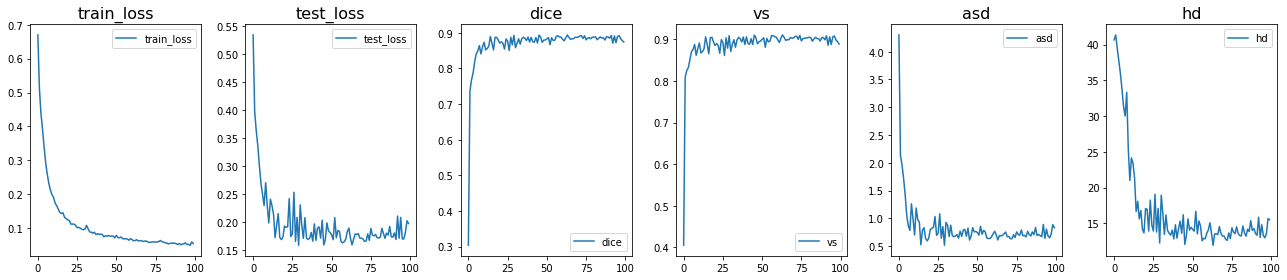

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

In [7]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)